In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
import datetime
import time

In [4]:
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'pandas_datareader'

In [4]:
import matplotlib.pyplot as plt
%matplotlib fu

In [5]:
import zipline

/home/chanche/anaconda3/envs/env_zipline/lib/python3.5/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


In [6]:
company_Dict={'腾讯':'0700.hk','阿里':'9988.hk'
            ,'美团':'3690.hk','小米':'1810.hk','招行':'3968.hk',}

In [7]:
list(company_Dict.values())

['3968.hk', '1810.hk', '3690.hk', '9988.hk', '0700.hk']

In [9]:
# 均线周期定义
# 周平均
MA_week = 7 
# 周平均
MA_2 = 14 

# 起止时间

start_date = '2018-11-01'
end_date ='2020-9-01'

# 股票目录
company_list=list(company_Dict.values() )


In [1030]:
#读取数据，数据来源Datareader yahoo

#df_stock=web.DataReader(company_list,'yahoo',start_date,end_date)
#df_stock=df_stock.reset_index()

In [1031]:
df_stock_total=web.DataReader(company_list,'yahoo',start_date,end_date)

In [1034]:
df_stock_total=df_stock_total.fillna(method='pad',axis=0)



In [1064]:
df_stock_total

Attributes        High                                                \
Symbols        0700.hk    1810.hk     3690.hk    3968.hk     9988.hk   
Date                                                                   
2018-11-01  283.200012  12.860000   56.900002  31.150000    0.000000   
2018-11-02  303.799988  13.540000   63.000000  33.549999    0.000000   
2018-11-05  296.399994  13.340000   64.400002  33.099998    0.000000   
2018-11-06  294.799988  13.280000   63.000000  33.299999    0.000000   
2018-11-07  301.799988  13.660000   63.500000  33.400002    0.000000   
2018-11-08  301.600006  14.120000   63.200001  33.950001    0.000000   
2018-11-09  287.600006  13.640000   60.049999  33.849998    0.000000   
2018-11-12  276.799988  13.560000   56.450001  32.250000    0.000000   
2018-11-13  275.399994  13.360000   55.200001  32.049999    0.000000   
2018-11-14  276.600006  13.340000   58.599998  31.799999    0.000000   
2018-11-15  288.799988  13.340000   58.150002  31.799999    0.000000   
2018-11-16  291.399994  13.200000   59.400002  31.799999    0.000000   
2018-11-19  294.799988  13.700000   60.000000  32.150002    0.000000   
2018-11-20  285.000000  14.800000   57.950001  31.549999    0.000000   
2018-11-21  291.399994  15.160000   60.200001  31.750000    0.000000   
2018-11-22  297.600006  15.000000   63.000000  31.850000    0.000000   
2018-11-23  294.600006  14.440000   57.000000  31.600000    0.000000   
2018-11-26  298.600006  14.560000   54.099998  31.900000    0.000000   
2018-11-27  303.799988  14.380000   53.099998  32.150002    0.000000   
2018-11-28  315.000000  14.640000   53.049999  32.000000    0.000000   
2018-11-29  320.799988  14.860000   55.250000  32.549999    0.000000   
2018-11-30  315.000000  14.400000   53.400002  32.450001    0.000000   
2018-12-03  328.200012  14.980000   55.549999  34.200001    0.000000   
2018-12-04  328.399994  14.940000   55.549999  34.200001    0.000000   
2018-12-05  323.799988  14.380000   55.299999  33.750000    0.000000   
2018-12-06  316.799988  14.180000   54.799999  32.900002    0.000000   
2018-12-07  313.799988  14.040000   54.450001  33.349998    0.000000   
2018-12-10  309.000000  13.500000   54.000000  31.650000    0.000000   
2018-12-11  313.600006  13.500000   53.250000  32.099998    0.000000   
2018-12-12  318.799988  13.720000   53.950001  32.450001    0.000000   
...                ...        ...         ...        ...         ...   
2020-07-23  557.500000  16.139999  201.199997  38.400002  248.000000   
2020-07-24  547.000000  15.760000  197.800003  37.400002  244.399994   
2020-07-27  538.000000  15.460000  195.000000  37.150002  244.199997   
2020-07-28  544.500000  15.120000  192.100006  37.099998  245.600006   
2020-07-29  542.500000  15.100000  193.600006  37.400002  244.000000   
2020-07-30  549.500000  15.280000  199.899994  37.200001  249.600006   
2020-07-31  550.000000  15.200000  201.000000  36.900002  249.000000   
2020-08-03  541.500000  15.260000  202.800003  36.500000  246.600006   
2020-08-04  556.500000  15.560000  221.600006  38.000000  255.000000   
2020-08-05  561.000000  15.660000  220.199997  37.700001  256.000000   
2020-08-06  564.000000  15.920000  229.199997  37.950001  257.799988   
2020-08-07  559.000000  15.920000  225.800003  37.150002  256.200012   
2020-08-10  518.000000  15.300000  228.800003  37.700001  244.800003   
2020-08-11  526.000000  15.380000  227.000000  39.799999  246.800003   
2020-08-12  523.000000  15.180000  218.000000  39.200001  244.600006   
2020-08-13  531.000000  15.480000  220.199997  39.099998  251.000000   
2020-08-14  514.000000  15.620000  226.000000  39.849998  248.800003   
2020-08-17  515.000000  16.660000  223.399994  41.500000  246.600006   
2020-08-18  516.500000  17.240000  236.600006  41.549999  252.600006   
2020-08-19  520.000000  18.340000  243.399994  40.900002  256.000000   
2020-08-20  509.000000  18.459999  236.000000  40.799999  255.800003   
2020-08-21  524.500000  18.620001  247.3

In [1038]:
HSI=web.DataReader('^HSI','yahoo',start_date,end_date)

In [1039]:
# 生成交易周期日期用于回测，设置交易周期间隔

def date_period(period):
    i=0
    global df_stock
    timelist=[]
    while i < (len(df_stock)):
        if len(df_stock['Date'])-i < period:
               break
                
        if i%period == 0:
        
            day_start = df_stock.iloc[i]['Date'][0].strftime('%Y-%m-%d')
            
            day_end = df_stock.iloc[i+(period-1)]['Date'][0].strftime('%Y-%m-%d')
            
            timelist.append([day_start,day_end])
        i+=1     
    return timelist        

In [1040]:
# 计算每个周期内 股票涨幅情况

def get_top_stock(company_list,date):
    MA_1= 7
    df_tech = pd.DataFrame(columns=[ '日期','股票代码','收盘价', '周期涨幅', '均线差值'])
    for stock in company_list:   
     
               
        idx_total = df_stock_total.index.get_loc(date)
        
        
        date_now = datetime.datetime.strptime(date,'%Y-%m-%d')
        
        date_pre = (date_now + datetime.timedelta(days=-MA_1))
        date_yesterday = (date_now + datetime.timedelta(days=-1))
        
        stock_close = df_stock_total.iloc[idx_total-MA_1+1:idx_total+1]['Close'][stock]
        
        idx= stock_close.index.get_loc(date)
        
        
        #当前价格
        current_price = stock_close.loc[date_now]
        
        #前N天的价格

        pre_price = stock_close.iloc[idx+1-MA_1]
        

        
        
        price_yesterday = stock_close.iloc[idx-1]
        
             
        #均线价格 默认为5
        stock_mean = stock_close.iloc[idx+1-MA_1:idx+1].mean()
                
        
        #周涨幅
        cp_increase = (current_price/pre_price-1)*100
        

        #当前价格与均线差值
        
        increase_mean = (current_price/stock_mean-1)*100

        
        increase_yesterday =(current_price/price_yesterday - 1 )*100
        
        

        df_tech =df_tech.append({'日期':date,'股票代码':stock,'收盘价':current_price,'周期涨幅':cp_increase,'均线差值':increase_mean,'当日升幅':increase_yesterday},ignore_index=True)
    # 选取周涨幅大于零， 均线差值大于零

    
    df_tech.sort_values(by='均线差值', ascending=False)
    df_tech_result=df_tech[(df_tech['周期涨幅']> 0 ) & (df_tech['均线差值']> 0 )]
    
    
    df_tech_result = df_tech_result.sort_values(by='均线差值',ascending = False)
    
    return df_tech_result


In [1041]:
daily_accout=pd.DataFrame()

In [1042]:
##交易逻辑

##每天开盘前取当天的收盘前一刻，与前N天的均价、对比，取排在前2的标的调仓 

##计算累计利润


def trade_daily_policy(company_list,date):
    global df_stock_total
    global daily_accout
    MA_1=12
    
    MA_2=6
    
    idx= df_stock_total.index.get_loc(date)
    

    HSI_vum = HSI.iloc[idx-MA_1+1:idx+1]['Volume']


    HSI_vum_mean= talib.MA(np.array(HSI_vum,dtype='float64'),MA_2)
    

    vol_diff = (HSI_vum - HSI_vum_mean)

    date_yesterday= df_stock_total['Close']['0700.hk'].index[idx-1].strftime('%Y-%m-%d')
    date_yesterday= df_stock_total['Close']['0700.hk'].index[idx-1].strftime('%Y-%m-%d')
    
    stock_top = get_top_stock(company_list,date)
    
    stock_list = stock_top['股票代码'].tolist()
    
    
    price_sell = df_stock_total.loc[date]['Close'][stock_list]
    price_buy = df_stock_total.loc[date_yesterday]['Close'][stock_list]

    profit = (price_sell -price_buy)/price_buy*100
    
    
    
    
    if (vol_diff[-MA_2:]< 0).all():
        daily_accout=daily_accout.append({'日期':date,'持仓':[],'日收益':[]},ignore_index=True)
        print(date)
    else:
        
        profit = round (stock_top[0:2]['当日升幅'].mean(),2)

        daily_accout=daily_accout.append({'日期':date,'持仓':stock_top[0:2]['股票代码'].tolist(),'日收益':profit,'日涨幅':stock_top[0:2]['收盘价'].tolist()},ignore_index=True)
        


In [1043]:
## 运行策略

for date_idx in  df_stock_total.index:
        
    if df_stock_total.index.get_loc(date_idx)< 13:
        continue
             
    trade_daily_policy(company_list,date_idx.strftime('%Y-%m-%d'))
    
    

/home/chanche/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars
/home/chanche/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/home/chanche/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in double_scalars


2018-12-17
2019-05-02
2019-05-03
2019-05-22
2019-07-10


/home/chanche/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars
/home/chanche/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in double_scalars


2020-02-13
2020-02-14
2020-02-17
2020-02-18
2020-02-19
2020-07-15
2020-07-16
2020-07-17
2020-07-20
2020-07-21


In [1067]:
daily_accout

,持仓,日收益,日涨幅
日期,,,
2018-11-20,"[1810.hk, 3690.hk]",3.03,"[14.739999771118164, 57.0]"
2018-11-21,"[1810.hk, 3690.hk]",2.71,"[14.84000015258789, 59.70000076293945]"
2018-11-22,"[3690.hk, 1810.hk]",-0.62,"[61.04999923706055, 14.319999694824219]"
2018-11-23,"[1810.hk, 0700.hk]",-0.23,"[14.4399995803833, 291.20001220703125]"
2018-11-26,"[0700.hk, 1810.hk]",0.68,"[298.0, 14.300000190734863]"
2018-11-27,[0700.hk],1.95,[303.79998779296875]
2018-11-28,"[0700.hk, 3968.hk]",2.29,"[314.79998779296875, 31.899999618530273]"
2018-11-29,"[0700.hk, 3968.hk]",0.03,"[312.0, 32.20000076293945]"
2018-11-30,"[0700.hk, 3968.hk]",0.23,"[312.0, 32.349998474121094]"


In [1045]:
df_profit = pd.DataFrame(columns=[ '日期','持仓','日收益'])

In [1046]:
daily_accout=daily_accout.set_index('日期',drop=True)

In [1047]:
daily_accout=daily_accout.fillna(0)

In [1048]:
def daily_profit():

    global daily_accout 
    global df_profit

    
    for date in daily_accout.index[1:]:
        idx = df_stock_total.index.get_loc(date)

        

        date_yesterday=  df_stock_total.index[idx-1].strftime('%Y-%m-%d')

        
        cangwei = daily_accout.loc[date_yesterday]['持仓']
        
        
        sell_price  = df_stock_total.loc[date]['Close'][cangwei]

        buy_price = df_stock_total.loc[date_yesterday]['Close'][cangwei]
  
        increase = (sell_price/buy_price-1)*100
        profit = round(increase.mean(),3)

        df_profit = df_profit.append({'日期':date,'持仓':daily_accout.loc[date]['持仓'],'日收益':profit},ignore_index=True)
        
        
        
        
        
        

In [1049]:
daily_profit()

In [1051]:
df_profit=df_profit.fillna(0)

In [1050]:
df_profit.head()

,日期,持仓,日收益
0,2018-11-21,"[1810.hk, 3690.hk]",2.708
1,2018-11-22,"[3690.hk, 1810.hk]",-0.621
2,2018-11-23,"[1810.hk, 0700.hk]",-5.478
3,2018-11-26,"[0700.hk, 1810.hk]",0.683
4,2018-11-27,[0700.hk],-0.705


In [1066]:
df_draw_daily=pd.DataFrame()

In [1053]:
def trade():
    global df_profit
    global df_draw_daily
    for i in df_profit.index:
        if i==0:
            print(i)
            df_draw_daily=df_draw_daily.append({ '日期':df_profit.loc[i]['日期'],'总市值':1},ignore_index=True)
        else:
            day_profit = (df_profit.loc[i]['日收益']/100 +1)*df_draw_daily.loc[i-1]['总市值']
            date = df_profit.loc[i]['日期']
            df_draw_daily=df_draw_daily.append({ '日期':date ,'持仓':df_profit.loc[i]['持仓'] ,'总市值': day_profit},ignore_index=True)


In [1054]:
trade()

0


In [1055]:
df_draw_daily=df_draw_daily.set_index('日期',drop=True)

In [1056]:
df_draw_daily

,总市值,持仓
日期,,
2018-11-21,1.000000,NaN
2018-11-22,0.993790,"[3690.hk, 1810.hk]"
2018-11-23,0.939350,"[1810.hk, 0700.hk]"
2018-11-26,0.945766,"[0700.hk, 1810.hk]"
2018-11-27,0.939098,[0700.hk]
2018-11-28,0.973103,"[0700.hk, 3968.hk]"
2018-11-29,0.973346,"[0700.hk, 3968.hk]"
2018-11-30,0.975614,"[0700.hk, 3968.hk]"
2018-12-03,1.019751,"[3968.hk, 0700.hk]"


In [1065]:
test=pd.DataFrame()

In [1058]:
df_draw_daily.index=pd.to_datetime(df_draw_daily.index)

In [1059]:
test= df_stock_total.loc[start_date:end_date]['Close'][company_list]

In [1060]:
test=test/test.iloc[0]

In [1061]:
test=pd.concat([test,df_draw_daily['总市值']],axis=1)

In [1062]:
test.head(40)

,3968.hk,0700.hk,3690.hk,1810.hk,9988.hk,总市值
2018-11-01,1.000000,1.000000,1.000000,1.000000,NaN,NaN
2018-11-02,1.071082,1.092873,1.088731,1.092382,NaN,NaN
2018-11-05,1.066236,1.052556,1.102928,1.059968,NaN,NaN
2018-11-06,1.069467,1.051116,1.114463,1.072934,NaN,NaN
2018-11-07,1.069467,1.056156,1.101154,1.077796,NaN,NaN
2018-11-08,1.085622,1.056876,1.061225,1.111831,NaN,NaN
2018-11-09,1.025848,1.005040,0.999113,1.069692,NaN,NaN
2018-11-12,1.033926,0.974082,0.957409,1.064830,NaN,NaN
2018-11-13,1.027464,0.987761,0.968057,1.077796,NaN,NaN
2018-11-14,1.016155,0.979842,1.009760,1.066451,NaN,NaN


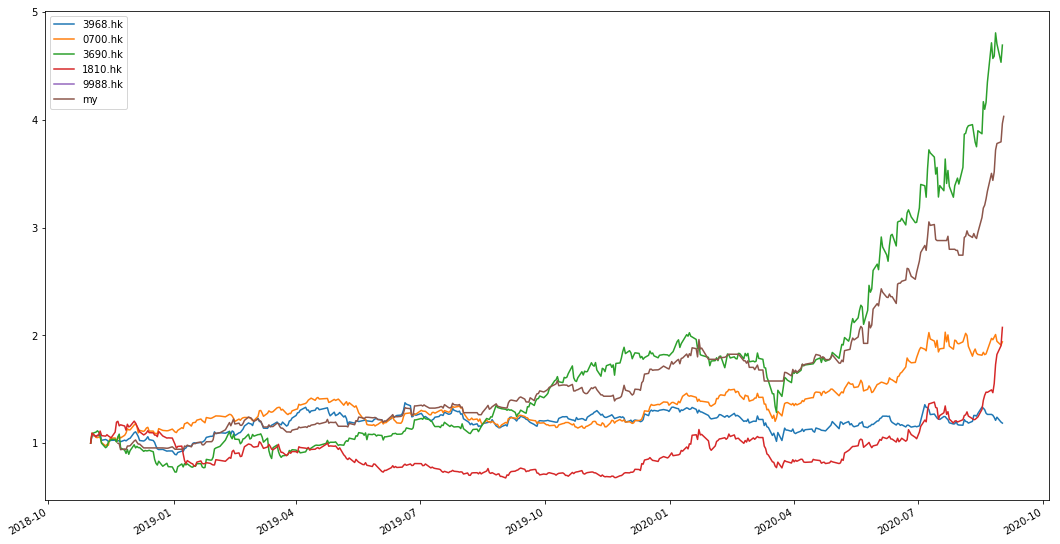

In [1063]:
test[company_list].plot(label = company_list ,figsize=[18,10])
test['总市值'].plot(label = 'my')
plt.legend()

In [950]:
test.iloc[-1]

3968.hk        NaN
9988.hk        NaN
3690.hk        NaN
1810.hk        NaN
0700.hk        NaN
总市值        2.38964
Name: 2020-09-02 00:00:00, dtype: float64

In [922]:
# 计算每笔利润

def profit_stock(stock_list,date_buy,date_sell):
    global df_stock
    price_sell = df_stock[df_stock['Date']==date_sell]['Close'][stock_list].values
    price_buy =df_stock[df_stock['Date']==date_buy]['Close'][stock_list].values
    profit = (price_sell -price_buy)/price_buy*100
    
    print(profit[0])
    
    df1=pd.DataFrame()
    df1=df1.append({'ts_code':stock_list,'profit':profit[0],'date':date_sell},ignore_index=True)

    return df1

In [961]:
import quandl


In [1071]:
web.get_data_yahoo('^HSI',start_date,end_date)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-01,25535.119141,25190.900391,25228.750000,25416.000000,2176972600,25416.000000
2018-11-02,26486.349609,25909.710938,25980.439453,26486.349609,3518978800,26486.349609
2018-11-05,26146.810547,25747.519531,26050.339844,25934.390625,1626675400,25934.390625
2018-11-06,26159.830078,25826.689453,26062.240234,26120.960938,1562913100,26120.960938
2018-11-07,26530.869141,25920.720703,26125.089844,26147.689453,1731287400,26147.689453
2018-11-08,26491.269531,26141.250000,26491.269531,26227.720703,1654626400,26227.720703
2018-11-09,25925.089844,25475.320312,25925.089844,25601.919922,1839798600,25601.919922
2018-11-12,25765.960938,25505.330078,25576.279297,25633.179688,1171178800,25633.179688
2018-11-13,25792.869141,25092.300781,25092.300781,25792.869141,1689989400,25792.869141


In [910]:
HSI1=HSI

In [964]:
quandl.ApiConfig.api_key='gRRaDr6r_3UcfRsWYjyb'

In [970]:
tdata = quandl.get("HKEX/HSIK2020")

In [971]:
tdata

,Open,Bid,Ask,Last Traded,High,Low,Volume,Prev. Day Settlement Price,Net Change,Prev. Day Open Interest
Date,,,,,,,,,,
2020-05-25,22800.0,None,None,None,22944.0,22498.0,183112.0,22889.0,188.0,120515.0
2020-05-26,23140.0,None,None,None,23478.0,23140.0,182870.0,23355.0,466.0,96156.0
2020-05-27,23387.0,None,None,None,23509.0,23103.0,125391.0,23205.0,-150.0,54583.0
2020-05-28,23183.0,None,None,None,23466.0,22966.0,16179.0,23129.0,-76.0,24122.0
2020-05-29,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,14474.0
